<a href="https://colab.research.google.com/github/AndrewCrossman/DSPS_ACrossman/blob/main/HW4/HW4_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1 From** [Hogg and Foreman-Mackey 2017](https://arxiv.org/pdf/1710.06068.pdf)

The chosen distribution shall be: *Laplace*

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pylab as plt
%pylab inline
plt.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# Set seed to allow for replicability of work
np.random.seed(420)

In [26]:
means, vars, skews, kurts = [], [], [], []
k = random.sample(1000)
k.sort()
#print(k)
for x in k:
  distribution = sp.stats.bernoulli.rvs(x,size=10000)
  means.append(distribution.mean()) 
  vars.append(distribution.var())
  skews.append(sp.stats.skew(distribution))
  kurts.append(sp.stats.kurtosis(distribution))

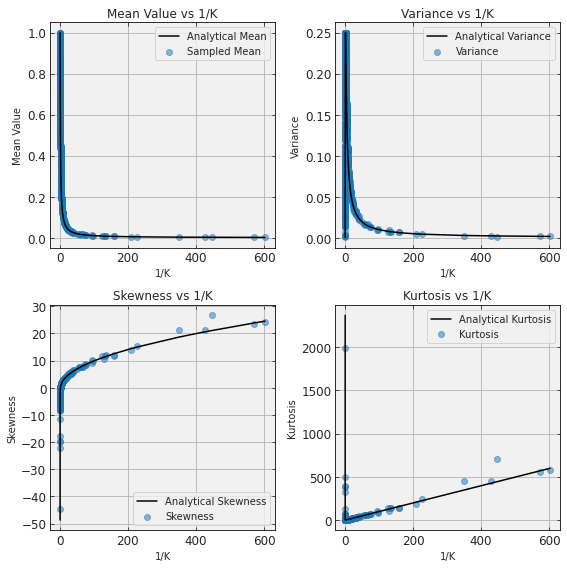

In [34]:
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
ax1.scatter(k**-1,means, alpha=0.5, label="Sampled Mean")
ax1.plot(k**-1,sp.stats.bernoulli.stats(k,moments='m'), color='k', label="Analytical Mean")
ax1.set_title("Mean Value vs 1/K")
ax1.set_xlabel("1/K")
ax1.set_ylabel("Mean Value")
ax1.grid()
ax1.legend(loc="upper right")

ax2.scatter(k**-1, vars, alpha=0.5, label="Variance")
ax2.plot(k**-1,sp.stats.bernoulli.stats(k,moments='v'), color='k', label="Analytical Variance")
ax2.set_title("Variance vs 1/K")
ax2.set_xlabel("1/K")
ax2.set_ylabel("Variance")
ax2.grid()
ax2.legend(loc="upper right")

ax3.scatter(k**-1, skews, alpha=0.5, label="Skewness")
ax3.plot(k**-1,sp.stats.bernoulli.stats(k,moments="s"), color='k', label="Analytical Skewness")
ax3.set_title("Skewness vs 1/K")
ax3.set_xlabel("1/K")
ax3.set_ylabel("Skewness")
ax3.grid()
ax3.legend(loc="lower right")

ax4.scatter(k**-1, kurts, alpha=0.5, label="Kurtosis")
ax4.plot(k**-1,sp.stats.bernoulli.stats(k,moments="k"), color='k', label="Analytical Kurtosis")
ax4.set_title("Kurtosis vs 1/K")
ax4.set_xlabel("1/K")
ax4.set_ylabel("Kurtosis")
ax4.grid()
ax4.legend(loc="upper right")

fig1.tight_layout()